## Saudi Arabia Coronavirus disease (COVID-19) situation — KAPSARC Data Portal

# Introduction

**What is a time series?**

According to the wikipedia, A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. For example, stock prices over a fixed period of time, hotel bookings, ecommerce sales, waether cycle reports etc.

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.


`ARIMA models` are, in theory, the most general class of models for forecasting a time series, which can be made to be “stationary” by differencing (if necessary), perhaps in conjunction with nonlinear transformations such as logging or deflating (if necessary). A random variable that is a time series is stationary if its statistical properties are all constant over time. A stationary series has no trend, its variations around its mean have a constant amplitude, and it wiggles in a consistent fashion, i.e., its short-term random time patterns always look the same in a statistical sense. The latter condition means that its autocorrelations (correlations with its prior deviations from the mean) remain constant over time, or equivalently, that its power spectrum remains constant over time. A random variable of this form can be viewed (as usual) as a combination of signal and noise, and the signal (if one is apparent) could be a pattern of fast or slow mean reversion, or sinusoidal oscillation, or rapid alternation in sign, and it could also have a seasonal component. An ARIMA model can be viewed as a “filter” that tries to separate the signal from the noise, and the signal is then extrapolated into the future to obtain forecasts.

# The Data

The data we will use is Saudi Arabia Coronavirus disease (COVID-19) situation data from 0 – 355 recording the number of disease per year.

# Import Packages

In addition to Statsmodels, we will need to import additional packages, including Numpy, Scipy, Pandas, and Matplotlib.

Also, from Statsmodels we will need to import qqplot.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.api import qqplot

In [2]:
dta= pd.read_excel("DATAset after Filtering.xlsx")
dta.head(10)

,Daily / Cumulative,Indicator,Date,Event,City,Region,Cases (person)
0,Daily,Cases,2020-03-09,flights suspended to number of countries,Ar Riyad,Ar Riyad,1
1,Daily,Cases,2020-03-13,NaN,Ar Riyad,Ar Riyad,3
2,Daily,Cases,2020-03-14,NaN,Ar Riyad,Ar Riyad,12
3,Daily,Cases,2020-03-15,International flights suspension for 14 days,Ar Riyad,Ar Riyad,2
4,Daily,Cases,2020-03-16,Gov / private suspension,Ar Riyad,Ar Riyad,4
5,Daily,Cases,2020-03-17,NaN,Ar Riyad,Ar Riyad,19
6,Daily,Cases,2020-03-18,NaN,Ar Riyad,Ar Riyad,19
7,Daily,Cases,2020-03-19,NaN,Ar Riyad,Ar Riyad,21
8,Daily,Cases,2020-03-20,NaN,Ar Riyad,Ar Riyad,49
9,Daily,Cases,2020-03-21,Domestic flights suspension,Ar Riyad,Ar Riyad,36


In [3]:
dta.shape

(355, 7)

In [4]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Daily / Cumulative  355 non-null    object        
 1   Indicator           355 non-null    object        
 2   Date                355 non-null    datetime64[ns]
 3   Event               12 non-null     object        
 4   City                355 non-null    object        
 5   Region              355 non-null    object        
 6   Cases (person)      355 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 19.5+ KB


## Data Preprocessing

In [5]:
# Remove columns which are not required in predictions

cols = ['Daily / Cumulative', 'Indicator', 'Event', 'City','Region']
dta.drop(cols, axis = 1, inplace = True)
dta.head()

,Date,Cases (person)
0,2020-03-09,1
1,2020-03-13,3
2,2020-03-14,12
3,2020-03-15,2
4,2020-03-16,4


In [6]:
# Sort the Date 
dta = dta.sort_values('Date')
#check any missing values
dta.isnull().sum()

Date              0
Cases (person)    0
dtype: int64

In [7]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 0 to 354
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            355 non-null    datetime64[ns]
 1   Cases (person)  355 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.3 KB


In [8]:
# grouping sales according to Date
dta.groupby('Date')['Cases (person)'].sum()

# min and max values of  Date
print(dta['Date'].min())
print(dta['Date'].max())

2020-03-09 00:00:00
2021-03-01 00:00:00


In [9]:
#set 'Date' as index
dta_df = dta.set_index('Date')
dta_df.index

DatetimeIndex(['2020-03-09', '2020-03-13', '2020-03-14', '2020-03-15',
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-21',
               ...
               '2021-02-20', '2021-02-21', '2021-02-22', '2021-02-23',
               '2021-02-24', '2021-02-25', '2021-02-26', '2021-02-27',
               '2021-02-28', '2021-03-01'],
              dtype='datetime64[ns]', name='Date', length=355, freq=None)

In [10]:
dta_df.head(10)

,Cases (person)
Date,
2020-03-09,1
2020-03-13,3
2020-03-14,12
2020-03-15,2
2020-03-16,4
2020-03-17,19
2020-03-18,19
2020-03-19,21
2020-03-20,49


In [11]:
# average the daily cases value for each month 
# use start of each month as the timestamp
y = dta_df['Cases (person)'].resample('MS').mean()
y['2020':]

Date
2020-03-01     28.650000
2020-04-01    131.600000
2020-05-01    522.129032
2020-06-01    864.866667
2020-07-01    216.258065
2020-08-01     67.903226
2020-09-01     36.133333
2020-10-01     33.193548
2020-11-01     54.666667
2020-12-01     34.032258
2021-01-01     46.419355
2021-02-01    105.214286
2021-03-01    119.000000
Freq: MS, Name: Cases (person), dtype: float64

## Data Visualization

In [12]:
import matplotlib
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

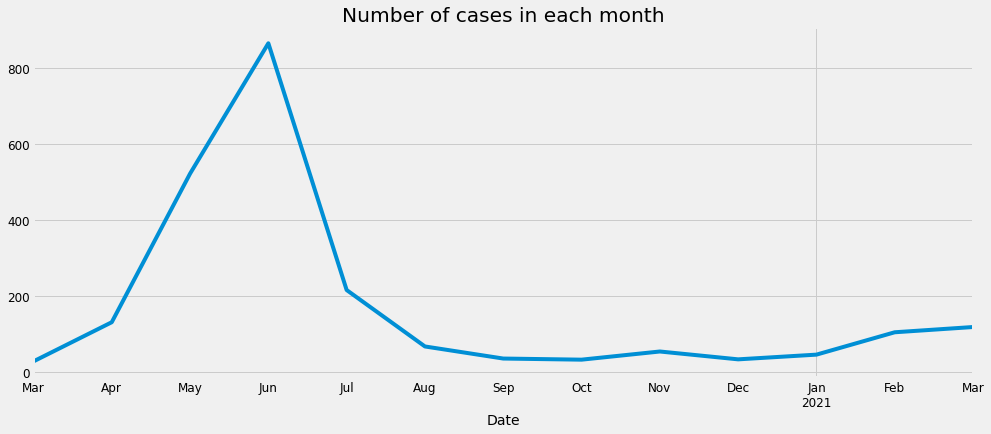

In [13]:
y.plot(figsize = (15, 6))
plt.title("Number of cases in each month")
plt.show()

###### Time-series decompositon 
* It allows us to decompose our time series into three distinct components
<ul>
<li>Trend</li>
<li>Seasonality</li>
<li>Noise</li>
</ul>


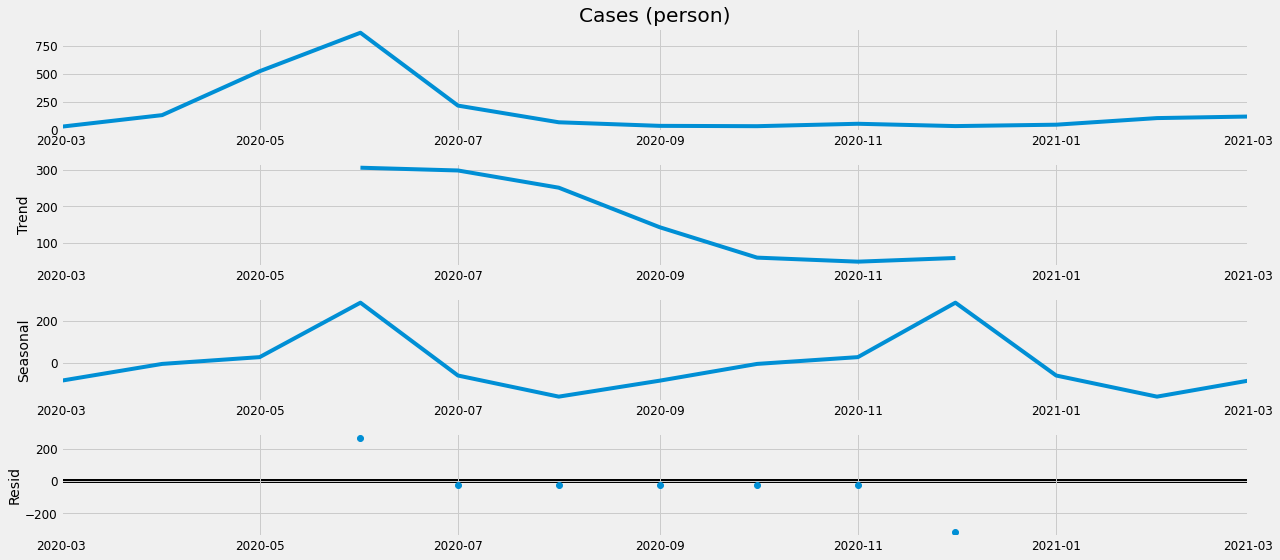

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive',period = int(len(y)/2))
fig = decomposition.plot()
plt.show()

<p>
    <b><i>About ARIMA model</i></b>
<ul>
    <li>ARIMA stands for <i>Autoregressive Integreted Moving Average</i></li>
    <li>ARIMA models are denoted with the notation <i>ARIMA(p, d, q)</i></li>
    <li>These three parameters account for <i>seasonality, trend, and noise</i> in data</li>
</ul>
</p>

# ARIMA Model

 **ARIMA as a feature:**
   
 Autoregressive Integrated Moving Average (ARIMA) — This was one of the most popular techniques for predicting future values of time series data (in the pre-neural networks ages). Let’s add it and see if it comes off as an important predictive feature.
   
  ARIMA is a technique for predicting time series data. We will show how to use it, and all though ARIMA will not serve as our final prediction, we will use it as a technique to denoise the stock a little and to (possibly) extract some new patters or features.
  
  **ARIMA is an acronym. This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:**

1. `AR: Autoregression`. A model that uses the dependent relationship between an observation and some number of lagged observations.

2. `I: Integrated`. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

3. `MA: Moving Average`. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

**The parameters of the ARIMA model are defined as follows:**

>`p:` The number of lag observations included in the model, also called the lag order.

>`d:` The number of times that the raw observations are differenced, also called the degree of differencing.

>`q:` The size of the moving average window, also called the order of moving average.

**STEPS FOR ARIMA**

1. Define the model by calling `ARIMA()` and passing in the p, d, and q parameters.

2. The model is prepared on the training data by calling the `fit()` function.

3. Predictions can be made by calling the `predict()` function and specifying the index of the time or times to be predicted.
 
First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

When fitting the model, a lot of debug information is provided about the fit of the linear regression model. We can turn this off by setting the disp argument to 0.

Running the example prints a summary of the fit model. This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations.





# Auto-correlations

Before we decide which model to use, we need to look at auto-correlations.

#### Autocorrelation correlogram. 
Seasonal patterns of time series can be examined via correlograms, which display graphically and numerically the autocorrelation function (ACF). Auto-correlation in pandas plotting and statsmodels graphics standardize the data before computing the auto-correlation. These libraries subtract the mean and divide by the standard deviation of the data.

#### Partial autocorrelations. 
Another useful method to examine serial dependencies is to examine the partial autocorrelation function (PACF) – an extension of autocorrelation, where the dependence on the intermediate elements (those within the lag) is removed.


In [15]:
sm.stats.durbin_watson(dta_df) # very less correlation

array([0.08305954])

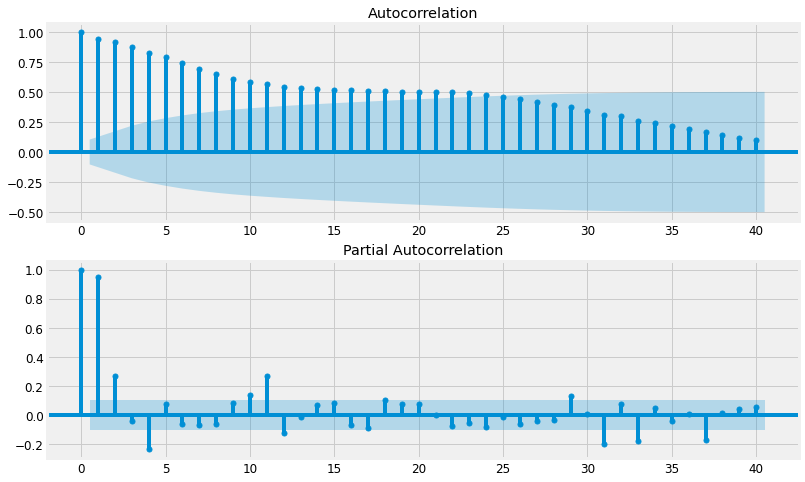

In [16]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta_df.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta_df, lags=40, ax=ax2)

In [17]:
training_data=dta_df[0:355]
test_data=dta_df[355:]

In [18]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [19]:
arima= ARIMA(training_data,order=(2,1,3))

In [20]:
# model=arima.fit()

In [21]:
import itertools
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [22]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:186.67013425755
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:188.38763407947098
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:13.84525991072763
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:187.14717555590872
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:189.14717555823887
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:181.44066583306827
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:183.1902940714873
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:182.74419321924415
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:184.7441932303682
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:168.2286001654984
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:170.2138484545431
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:170.1714076062512
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:172.22459026241762
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:170.07823017096806
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:172.05736007429724
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA

In [23]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12),
                                  enforce_stationarity = False,
                                  enforce_invertibility=False
                                 )
result = model.fit()
print(result.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
ar.S.L12            0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.000       1.000       1.000


In [24]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                      Cases (person)   No. Observations:                   13
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                   0.000
Date:                             Mon, 08 Mar 2021   AIC                              8.000
Time:                                     14:12:21   BIC                                nan
Sample:                                 03-01-2020   HQIC                               nan
                                      - 03-01-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
ar.S.L12            0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.000       1.000       1.000
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

### Train the ARIMA Model

In [25]:
series = dta_df['Cases (person)']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.Cases (person)   No. Observations:                  354
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2119.152
Method:                       css-mle   S.D. of innovations             96.256
Date:                Mon, 08 Mar 2021   AIC                           4252.305
Time:                        14:12:25   BIC                           4279.390
Sample:                             1   HQIC                          4263.081
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3218      4.836      0.067      0.947      -9.156       9.800
ar.L1.D.Cases (person)    -0.2538      0.053     -4.787      0.000      -0.358      -0.150
ar.L

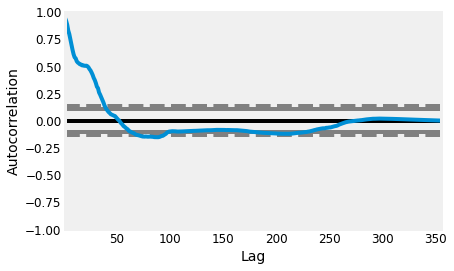

<Figure size 800x560 with 0 Axes>

In [26]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

## Predictions

In [27]:
pred = result.predict('2021','2023',dynamic=True)
pred

2021-01-01     34.032258
2021-02-01     34.032258
2021-03-01     53.132258
2021-04-01    156.082258
2021-05-01    546.611290
2021-06-01    889.348925
2021-07-01    240.740323
2021-08-01     92.385484
2021-09-01     60.615591
2021-10-01     57.675806
2021-11-01     79.148925
2021-12-01     58.514516
2022-01-01     58.514516
2022-02-01     58.514516
2022-03-01     77.614516
2022-04-01    180.564516
2022-05-01    571.093548
2022-06-01    913.831183
2022-07-01    265.222581
2022-08-01    116.867742
2022-09-01     85.097849
2022-10-01     82.158065
2022-11-01    103.631183
2022-12-01     82.996774
2023-01-01     82.996774
Freq: MS, Name: predicted_mean, dtype: float64

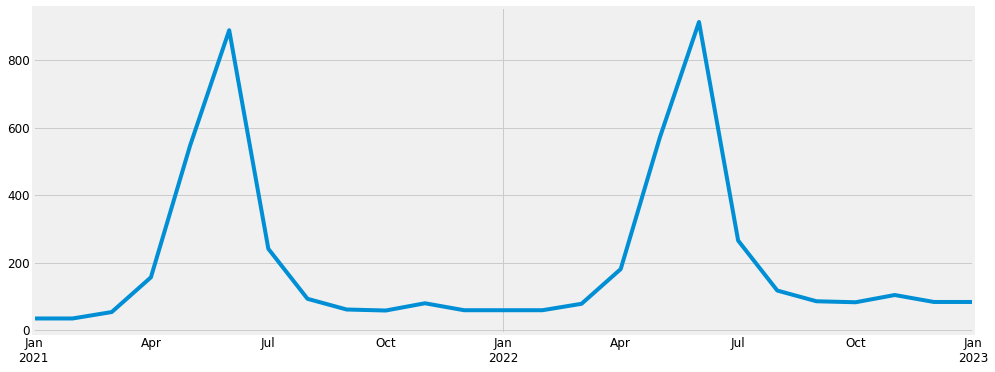

In [28]:
pred.plot(figsize = (15, 6))
plt.show()

###### Validating Forecasts

<p>
To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at <i>2017–01–01</i> to <i>the end of the data.</i>
</p>

In [35]:
prediction = result.get_prediction(start = pd.to_datetime('2021-01-01'),end=pd.to_datetime('2023-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Cases (person),upper Cases (person)
2021-01-01,-2737.776084,2805.840600
2021-02-01,-2725.388987,2818.227696
2021-03-01,-2405.989097,2654.617669
2021-04-01,219.990036,223.909964
2021-05-01,609.707225,615.250840
2021-06-01,951.821909,958.611424
2021-07-01,302.688137,310.527992
2021-08-01,153.870613,162.635839
2021-09-01,121.682422,131.284245
2021-10-01,118.357971,128.729126


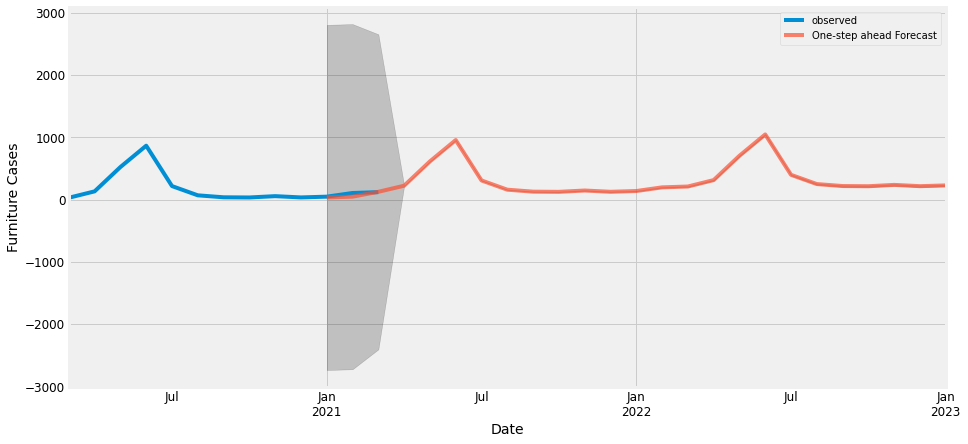

In [38]:
#Visualize the forecasting
ax = y['2020':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Furniture Cases')
plt.legend()
plt.show()



## Calculate Forecast Errors

#### Mean absolute error:
The mean absolute error (MAE) value is computed as the average absolute error value. If this value is 0 (zero), the fit (forecast) is perfect. As compared to the mean squared error value, this measure of fit will “de-emphasize” outliers, that is, unique or rare large error values will affect the MAE less than the MSE value.

#### Mean Forecast Error (Bias).
The mean forecast error (MFE) is the average error in the observations. A large positive MFE means that the forecast is undershooting the actual observations, and a large negative MFE means the forecast is overshooting the actual observations. A value near zero is ideal.

The MAE is a better indicator of fit than the MFE.

In [39]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2020-03-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))


The Mean Squared Error of our forecasts is 1212.84
The Root Mean Squared Error of our forecasts is 34.83


## Summary

<ul>
<li>Our model clearly captured furniture cases seasonality.</li>
<li>As we forecast further out into the future, it is natural for us to become less confident in our values.</li>
<li>This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.</li>

</ul>